In [34]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [35]:
df = pd.read_csv("Credit-Score-Classification-Dataset.csv")
df.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 164 non-null    int64 
 1   Gender              164 non-null    object
 2   Income              164 non-null    int64 
 3   Education           164 non-null    object
 4   Marital Status      164 non-null    object
 5   Number of Children  164 non-null    int64 
 6   Home Ownership      164 non-null    object
 7   Credit Score        164 non-null    object
dtypes: int64(3), object(5)
memory usage: 10.4+ KB


In [37]:
df.describe()

,Age,Income,Number of Children
count,164.000000,164.000000,164.000000
mean,37.975610,83765.243902,0.652439
std,8.477289,32457.306728,0.883346
min,25.000000,25000.000000,0.000000
25%,30.750000,57500.000000,0.000000
50%,37.000000,83750.000000,0.000000
75%,45.000000,105000.000000,1.000000
max,53.000000,162500.000000,3.000000


In [38]:
print(df.apply(lambda col: col.unique()))

Age                   [25, 30, 35, 40, 45, 50, 26, 31, 36, 41, 46, 5...
Gender                                                   [Female, Male]
Income                [50000, 100000, 75000, 125000, 150000, 40000, ...
Education             [Bachelor's Degree, Master's Degree, Doctorate...
Marital Status                                        [Single, Married]
Number of Children                                         [0, 2, 1, 3]
Home Ownership                                          [Rented, Owned]
Credit Score                                       [High, Average, Low]
dtype: object


In [39]:
df.isnull().sum()

Age                   0
Gender                0
Income                0
Education             0
Marital Status        0
Number of Children    0
Home Ownership        0
Credit Score          0
dtype: int64

In [40]:
print("Total categories in the feature Age:\n", df["Age"].value_counts(), "\n")

print("Total categories in the feature Gender:\n", df["Gender"].value_counts(), "\n")

print("Total categories in the feature Income:\n", df["Income"].value_counts(), "\n")

print("Total categories in the feature Education:\n", df["Education"].value_counts(),"\n")

print("Total categories in the feature Marital_Status:\n", df["Marital Status"].value_counts(), "\n")

print("Total categories in the feature Number of Children:\n", df["Number of Children"].value_counts(), "\n")

print("Total categories in the feature Home Ownership:\n", df["Home Ownership"].value_counts(), "\n")

print("Total categories in the feature Credit Score:\n", df["Credit Score"].value_counts(), "\n")

Total categories in the feature Age:
 Age
25    9
35    9
30    9
31    6
33    6
32    6
29    6
26    6
34    6
28    6
52    5
53    5
48    5
43    5
38    5
39    5
44    5
37    5
47    5
42    5
27    5
51    5
46    5
41    5
36    5
50    5
45    5
40    5
49    5
Name: count, dtype: int64 

Total categories in the feature Gender:
 Gender
Female    86
Male      78
Name: count, dtype: int64 

Total categories in the feature Income:
 Income
85000     8
57500     7
105000    7
90000     7
95000     7
77500     5
67500     5
87500     5
62500     5
47500     5
27500     4
110000    4
32500     4
130000    4
52500     4
65000     4
55000     4
37500     4
80000     4
60000     4
75000     4
100000    4
92500     3
112500    3
117500    3
50000     3
70000     3
45000     3
115000    3
125000    3
140000    2
97500     2
142500    2
72500     2
135000    2
150000    2
122500    2
82500     2
155000    2
35000     1
30000     1
40000     1
25000     1
160000    1
145000    1
162500  

C:\Users\porte\AppData\Local\Temp\ipykernel_13380\301689715.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  wedges, texts, autotexts = plt.pie([df["Education"].value_counts()[0],
C:\Users\porte\AppData\Local\Temp\ipykernel_13380\301689715.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df["Education"].value_counts()[1],
C:\Users\porte\AppData\Local\Temp\ipykernel_13380\301689715.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[po

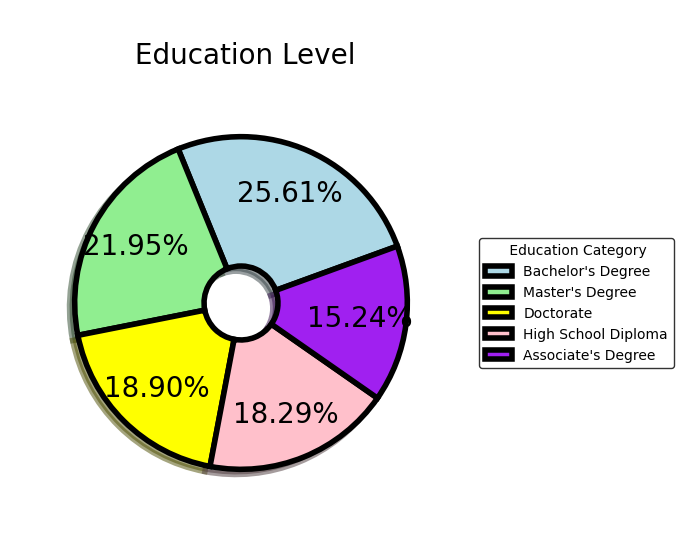

In [41]:
plt.subplots(figsize=(6,6))

labels = "Bachelor's Degree","Master's Degree","Doctorate", "High School Diploma", "Associate's Degree"
size = 0.7

wedges, texts, autotexts = plt.pie([df["Education"].value_counts()[0],
                                    df["Education"].value_counts()[1],
                                    df["Education"].value_counts()[2],
                                    df["Education"].value_counts()[3],
                                    df["Education"].value_counts()[4]],
                                    explode = (0,0,0,0,0),
                                    textprops=dict(size= 20, color= "black"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.72,
                                    radius=.9, 
                                    colors = ["#ADD8E6","#90EE90","#FFFF00", "#FFC0CB", "#A020F0"], 
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "black", 
                                    linewidth = 4),
                                    startangle = 20)

plt.legend(wedges, labels, title=" Education Category",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")
plt.title("\n Education Level",fontsize=20);
plt.show()

C:\Users\porte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\porte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


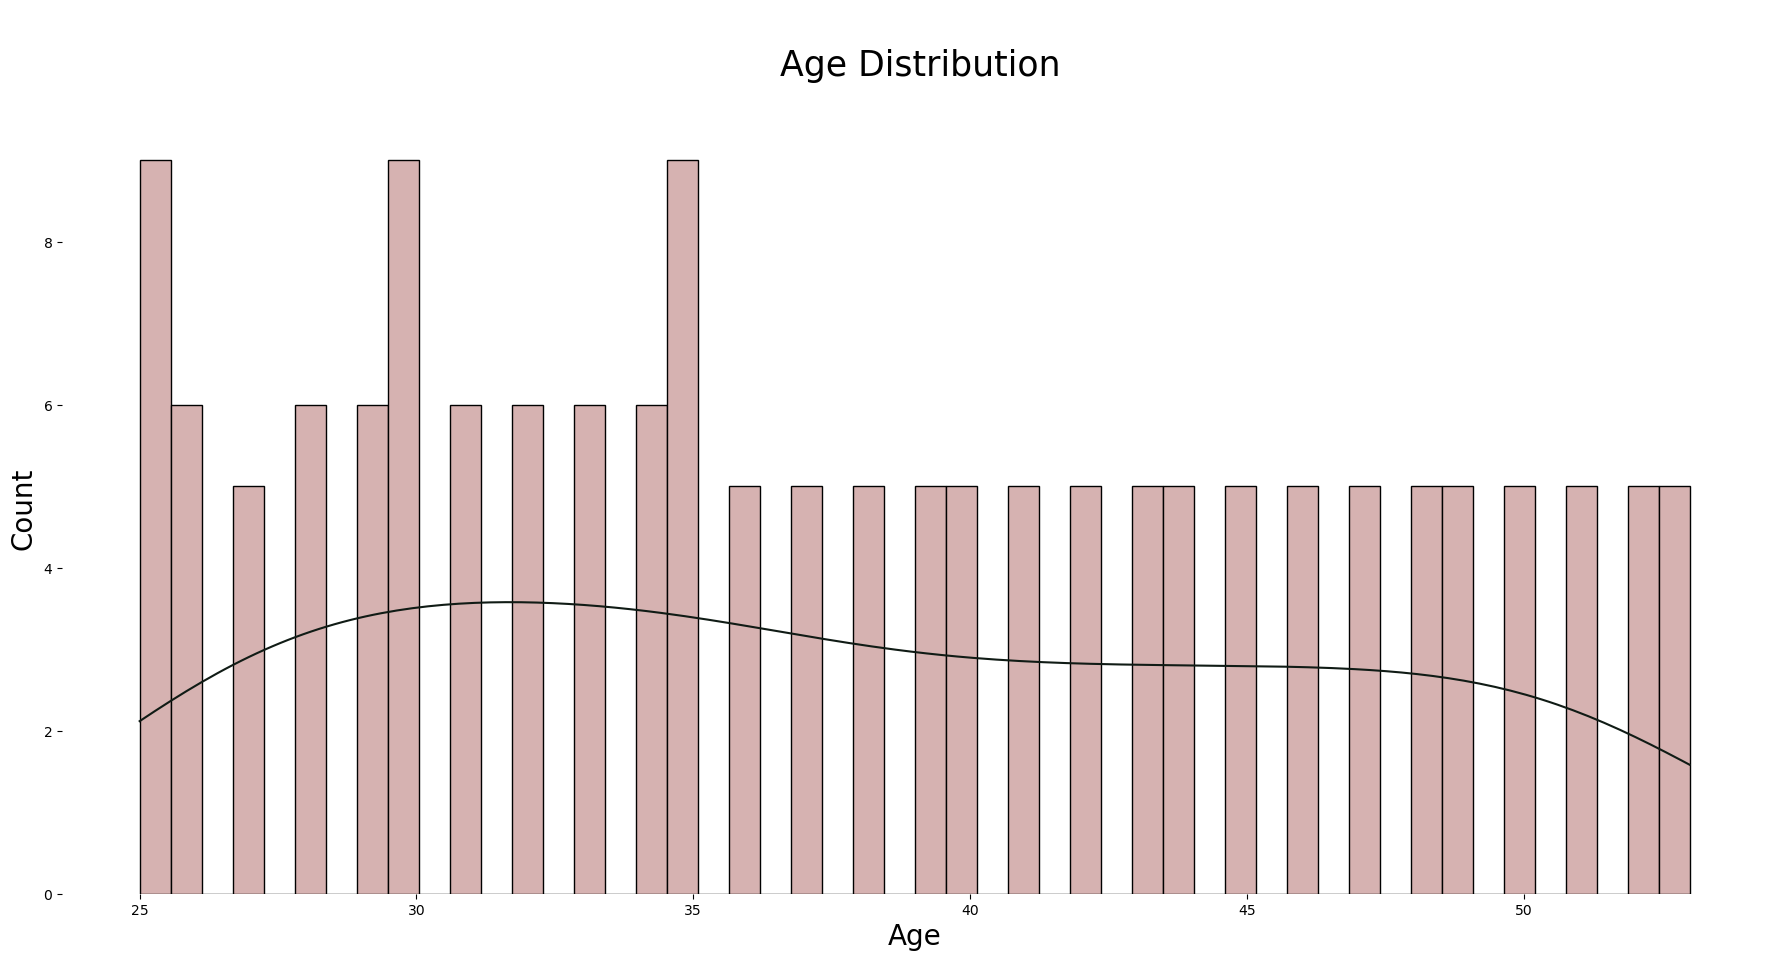

In [42]:
plt.subplots(figsize=(22, 10))
p = sns.histplot(df["Age"],color="#D6B2B1",kde=True,bins=50,alpha=1,fill=True,edgecolor="black")
p.axes.lines[0].set_color("#101B15")
p.axes.set_title("\n Age Distribution\n",fontsize=25)
plt.ylabel("Count",fontsize=20)
plt.xlabel("Age",fontsize=20)
sns.despine(left=True, bottom=True)

plt.show()

C:\Users\porte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\porte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\porte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


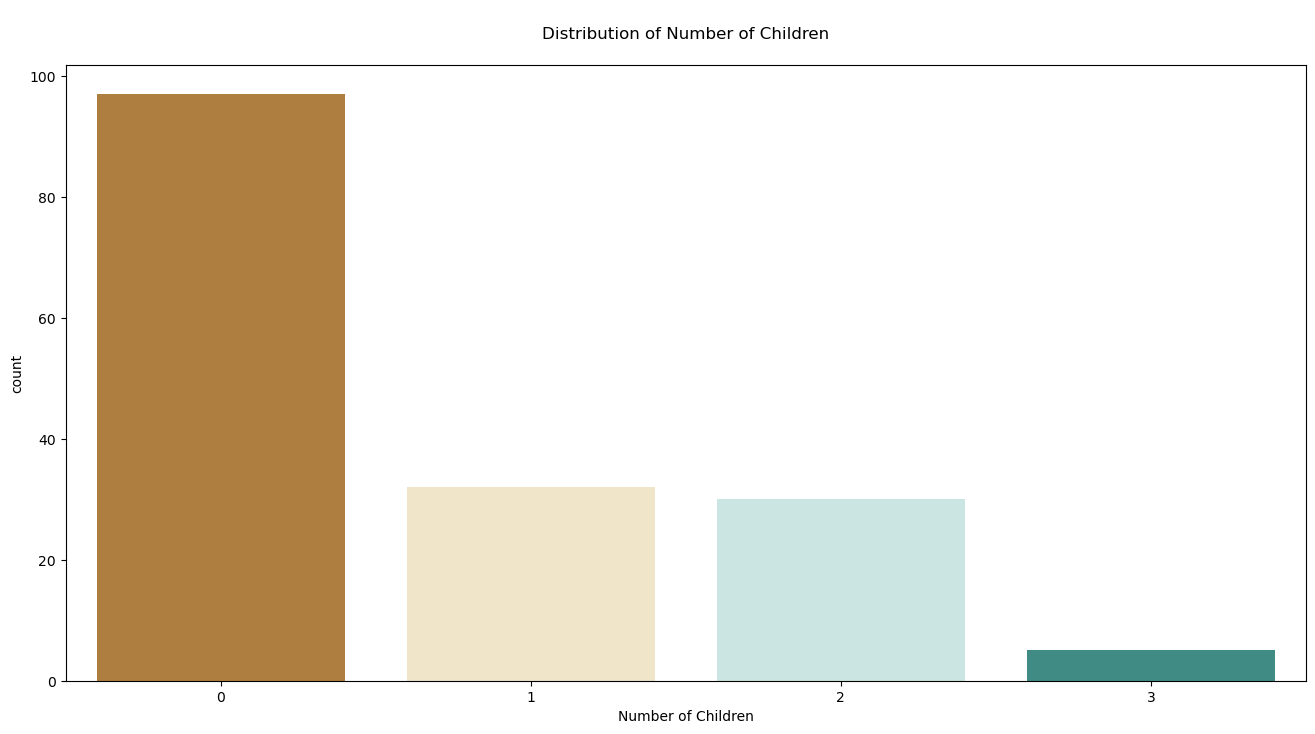

In [43]:
plt.figure(figsize=(16, 8))
sns.countplot(x="Number of Children",data=df,palette="BrBG",linewidth=3)
plt.title("\nDistribution of Number of Children\n")
plt.show()

C:\Users\porte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\porte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\porte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\porte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

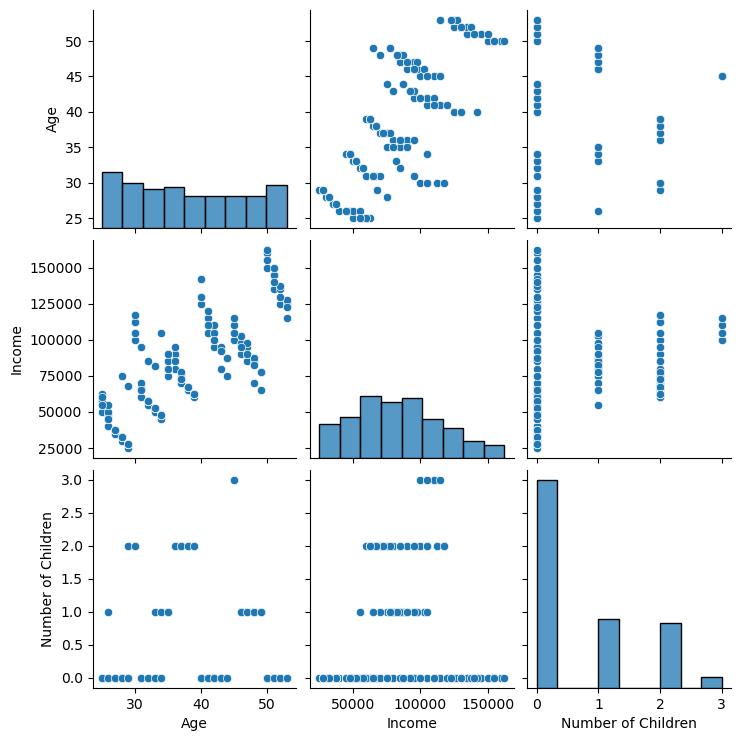

In [44]:
# A broader view of the data
sns.pairplot(df)

<Axes: xlabel='Age', ylabel='Income'>

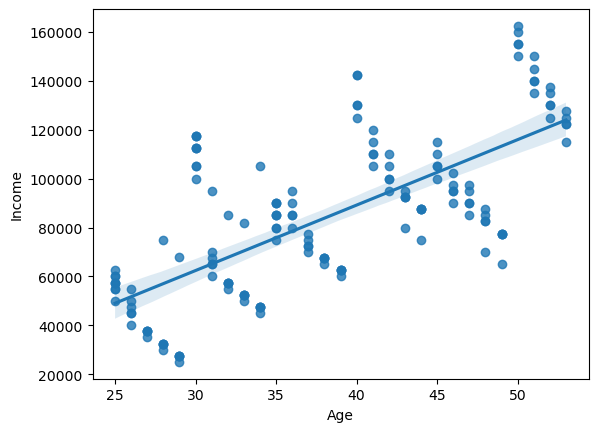

In [45]:
sns.regplot(x=df['Age'], y=df['Income'])

C:\Users\porte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\porte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\porte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\porte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

<Axes: xlabel='Age', ylabel='Income'>

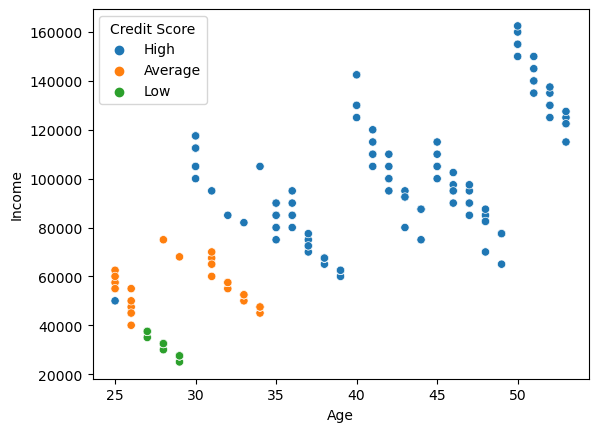

In [46]:
sns.scatterplot(x=df['Age'], y=df['Income'], hue=df['Credit Score'])

C:\Users\porte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\porte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\porte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\porte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

<Axes: xlabel='Age', ylabel='Income'>

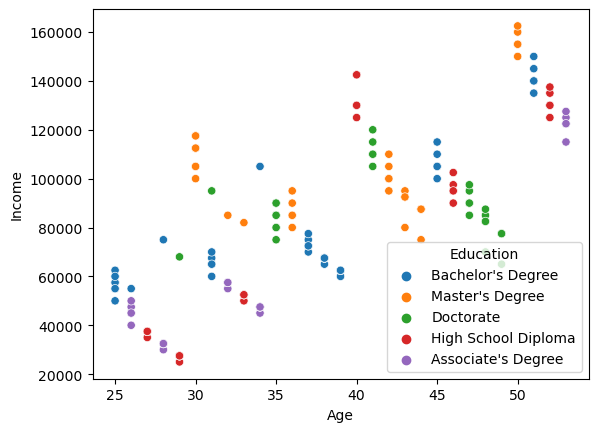

In [47]:
sns.scatterplot(x=df['Age'], y=df['Income'], hue=df['Education'])

C:\Users\porte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\porte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\porte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\porte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

Text(0.5, 1.0, 'Distribution of Credit Scores by Home Ownership')

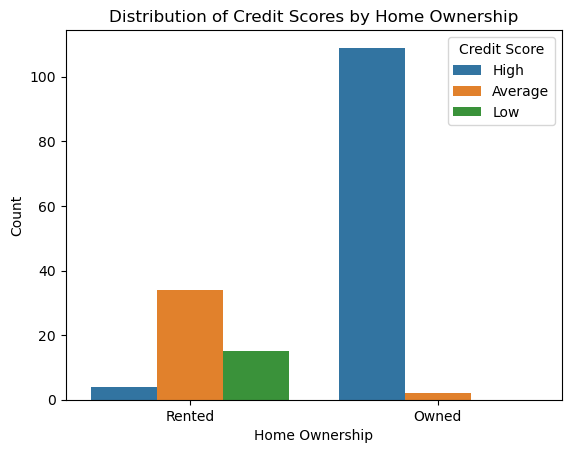

In [48]:
sns.countplot(x='Home Ownership', hue='Credit Score', data=df)
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.title('Distribution of Credit Scores by Home Ownership')

C:\Users\porte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\porte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\porte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 0, 'Category of Credit Score')

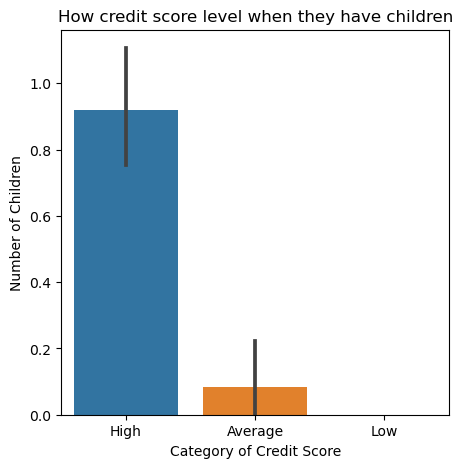

In [49]:
plt.figure(figsize=(5,5))
plt.title("How credit score level when they have children")
sns.barplot(y=df['Number of Children'], x=df['Credit Score'])
plt.xlabel("Category of Credit Score")

C:\Users\porte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\porte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\porte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\porte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

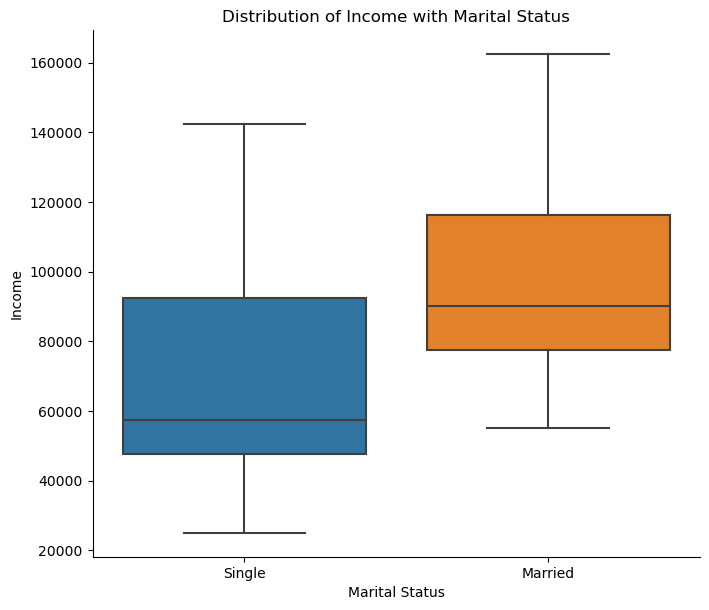

In [50]:
sns.catplot(x='Marital Status', y='Income', kind='box', data=df, height=6, aspect=1.2)
plt.ylabel('Income')
plt.xlabel('Marital Status')
plt.title("Distribution of Income with Marital Status")
plt.show()

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn import tree

In [52]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['Education'] = df['Education'].map({'High School Diploma': 0, "Associate's Degree": 1, "Bachelor's Degree": 2, "Master's Degree": 3, 'Doctorate': 4})
df['Marital Status'] = df['Marital Status'].map({'Single': 0, 'Married': 1})
df['Home Ownership'] = df['Home Ownership'].map({'Rented': 0, 'Owned': 1})
df['Credit Score'] = df['Credit Score'].map({'Low': 0, 'Average': 1, 'High': 2})

In [53]:
df['Gender'] = df['Gender'].astype('category')
df['Education'] = df['Education'].astype('category')
df['Marital Status'] = df['Marital Status'].astype('category')
df['Home Ownership'] = df['Home Ownership'].astype('category')
df['Credit Score'] = df['Credit Score'].astype('category')

In [54]:
df.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,1,50000,2,0,0,0,2
1,30,0,100000,3,1,2,1,2
2,35,1,75000,4,1,1,1,2
3,40,0,125000,0,0,0,1,2
4,45,1,100000,2,1,3,1,2


In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [56]:
# Split the data into features (X) and target variable (y)
X = df.drop('Credit Score', axis=1)
y = df['Credit Score']

In [57]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, random_state=13)

In [58]:
# Decision Tree Model
# Train the model
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(
    criterion = 'gini',
    splitter = 'best'
)
model.fit(X_train, y_train)

DecisionTreeClassifier()

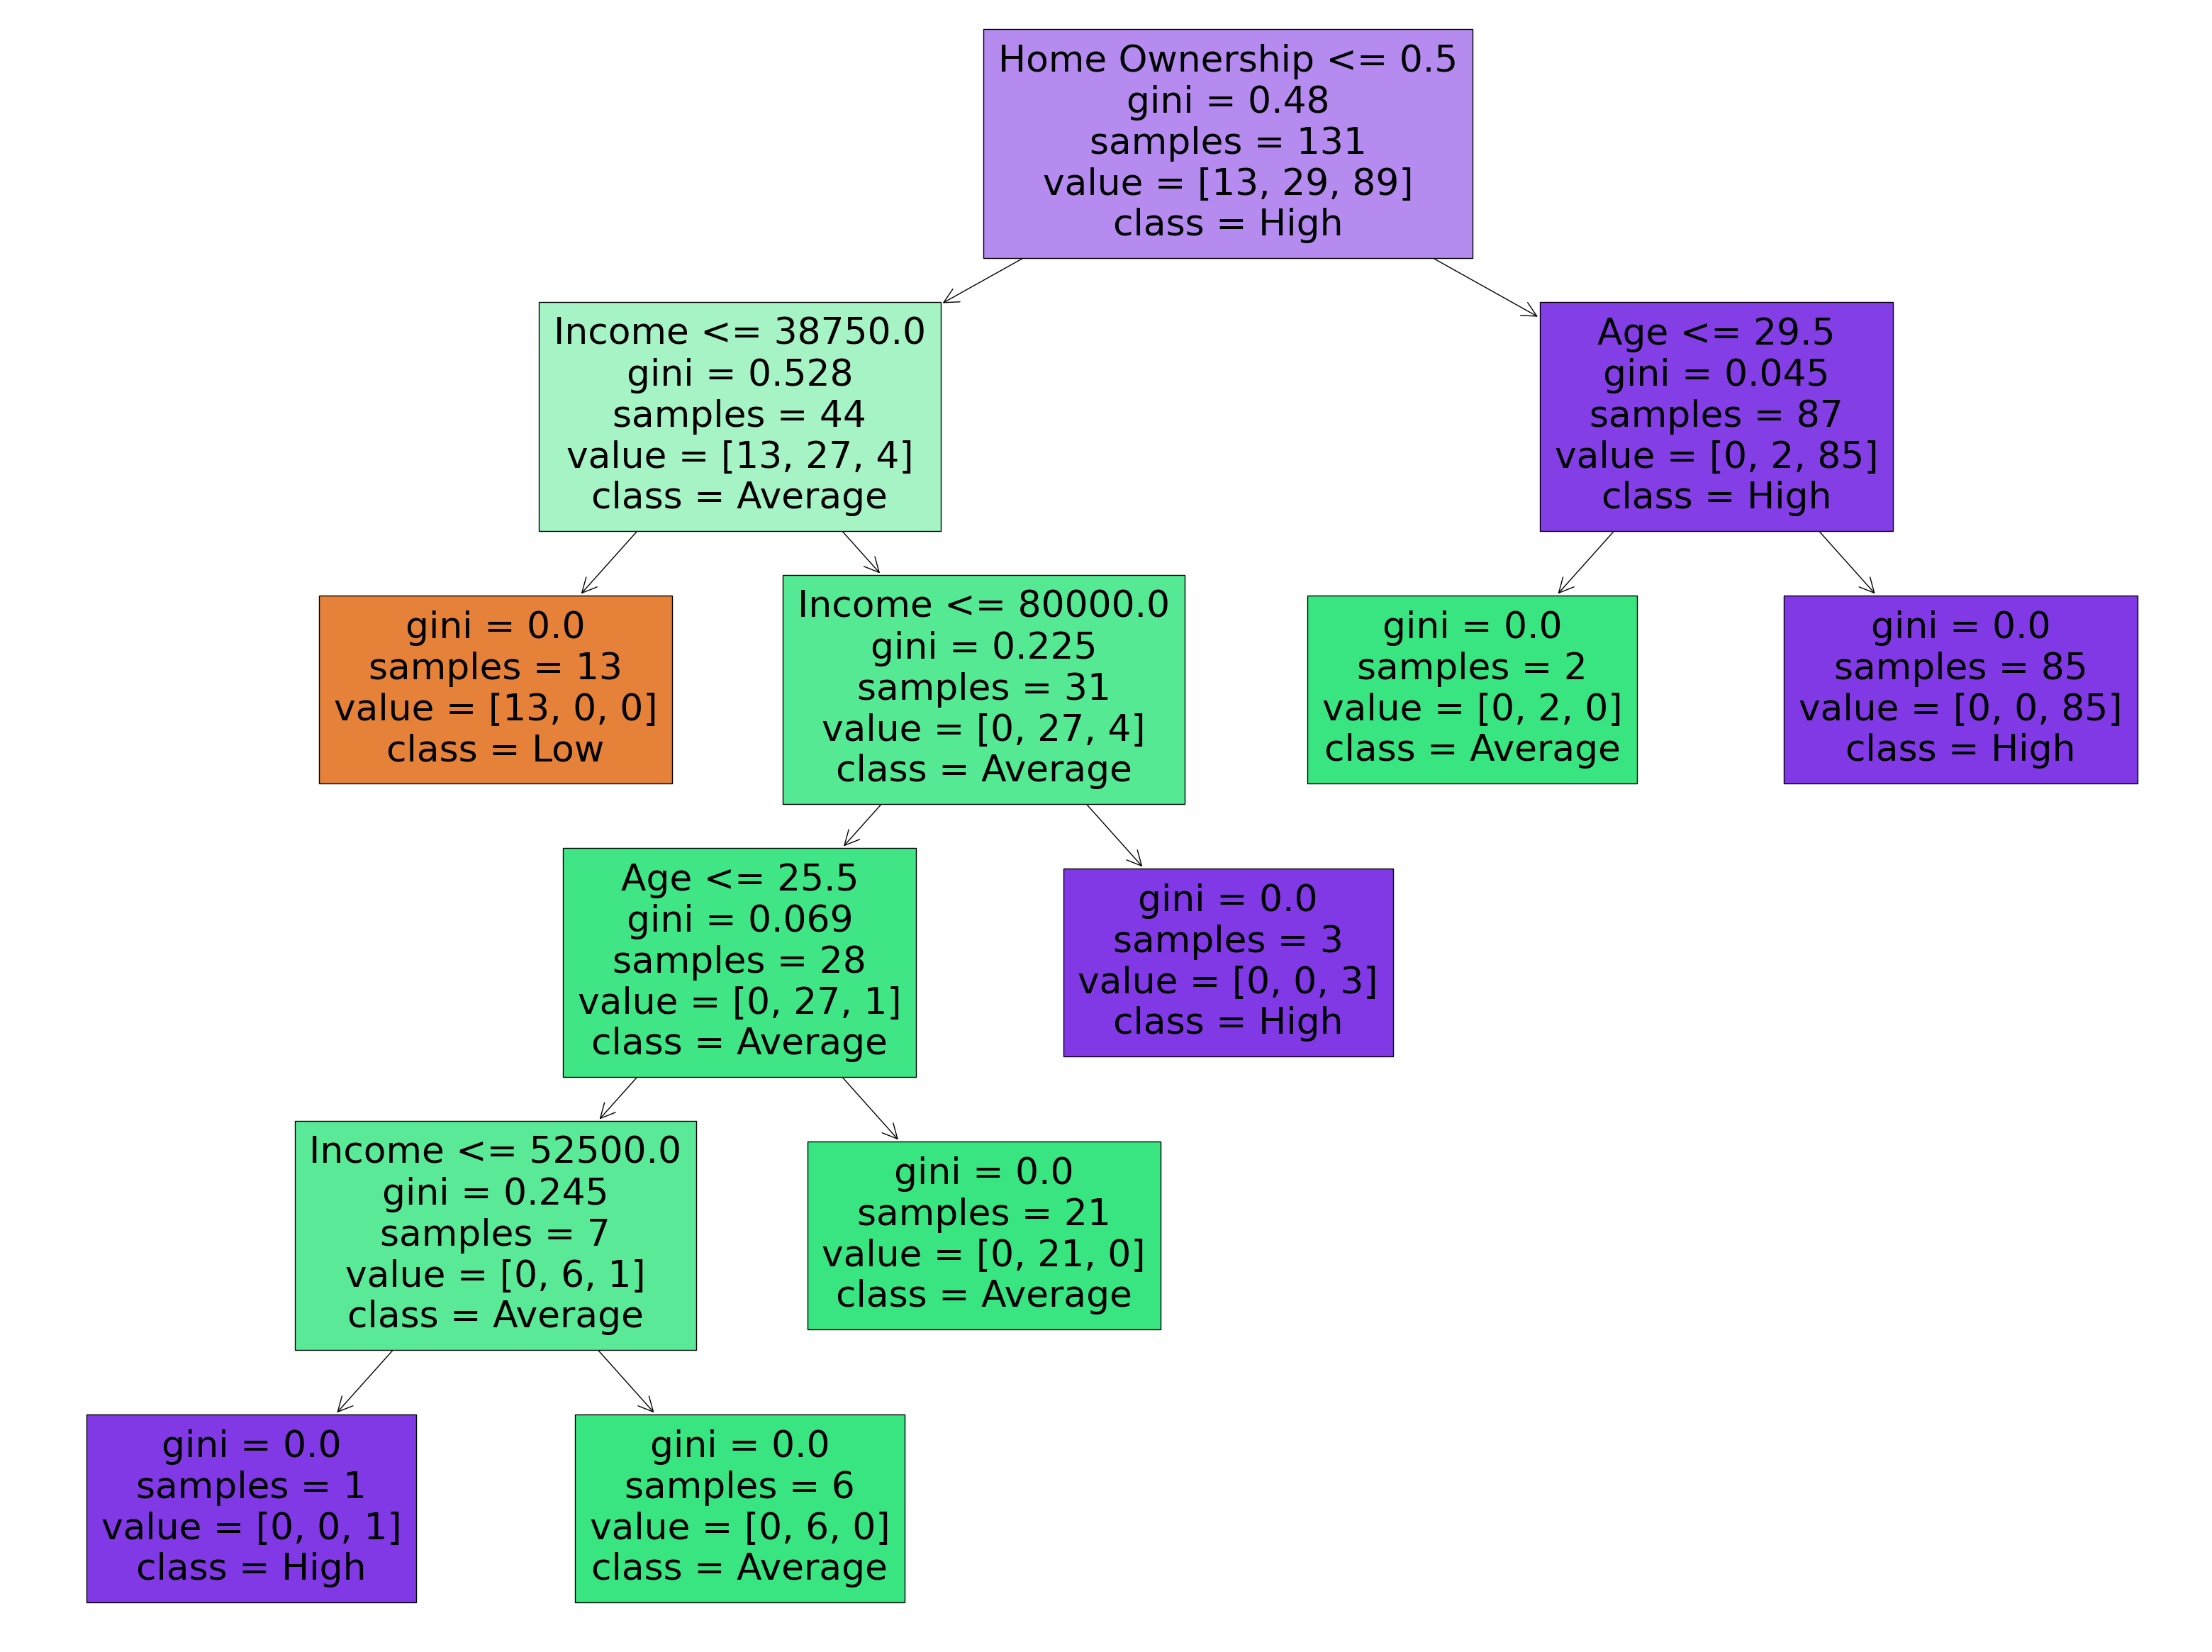

In [59]:
# Tree plotting
from matplotlib import pyplot as plt
from sklearn import tree
plt.figure(figsize=(40,30))
tree.plot_tree(
    model,
    feature_names=['Age','Gender', 'Income', 'Education', 'Marital Status', 'Number of Children', 'Home Ownership'], 
    class_names = ['Low','Average', 'High'],
    filled = True
)
plt.show()

In [60]:
# Model prediction
y_pred = model.predict(X_test)
y_pred

array([2, 1, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2], dtype=int64)

In [61]:
#Model evaluation
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score, ConfusionMatrixDisplay
acc = accuracy_score(y_pred,y_test)
cm = confusion_matrix(y_test,y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00        24

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33



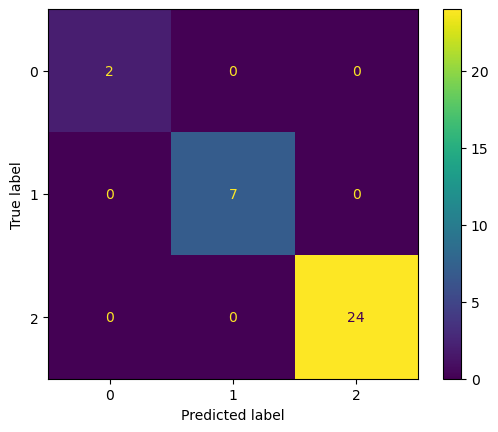

In [62]:
# Demo the evaluation
print('Accuracy:',acc)
print(classification_report(y_test,y_pred))
cm_display.plot()
plt.show()

In [ ]:
# Function to get user input
def get_user_input():
    age = int(input("Enter your age: "))
    gender = input("Enter your gender (Male/Female): ").capitalize()
    income = float(input("Enter your income: "))
    education = input("Enter your education level (High School Diploma/Associate's Degree/Bachelor's Degree/Master's Degree/Doctorate): ").capitalize()
    marital_status = input("Enter your marital status (Single/Married): ").capitalize()
    num_children = int(input("Enter the number of children: "))
    home_ownership = input("Enter your home ownership status (Rented/Owned): ").capitalize()
    return age, gender, income, education, marital_status, num_children, home_ownership

# Function to preprocess user input
# Function to preprocess user input
def preprocess_user_input(user_input):
    age, gender, income, education, marital_status, num_children, home_ownership = user_input
    gender = 0 if gender == 'Male' else 1
    education_map = {"high school diploma": 0, "associate's degree": 1, "bachelor's degree": 2, "master's degree": 3, 'doctorate': 4}
    education = education.lower()  # Convert input to lowercase
    education = education_map[education]  # Get value from lowercase key
    marital_status = 0 if marital_status == 'Single' else 1
    home_ownership = 0 if home_ownership == 'Rented' else 1
    return age, gender, income, education, marital_status, num_children, home_ownership

# Get user input
user_input = get_user_input()

# Function to predict credit score
def predict_credit_score(model, user_input):
    preprocessed_input = preprocess_user_input(user_input)
    prediction = model.predict([preprocessed_input])[0]
    if prediction == 0:
        return "Low"
    elif prediction == 1:
        return "Average"
    else:
        return "High"

# Predict credit score
predicted_credit_score = predict_credit_score(model, user_input)
print("Predicted Credit Score Level:", predicted_credit_score)




# Get user input
user_input = get_user_input()

# Predict credit score
predicted_credit_score = predict_credit_score(model, user_input)
print("Predicted Credit Score Level:", predicted_credit_score)


Enter your age: 20
Enter your gender (Male/Female): Male
Enter your income: 60000
Enter your education level (High School Diploma/Associate's Degree/Bachelor's Degree/Master's Degree/Doctorate): Doctorate
Enter your marital status (Single/Married): Single
Enter the number of children: 0
Enter your home ownership status (Rented/Owned): Owned


C:\Users\porte\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Predicted Credit Score Level: Average
